In [1]:
#https://www.kaggle.com/lkuffo/exploratory-data-analysis-w-python
#http://brandonrose.org/clustering
#pip install wordcloud
#pip install mpld3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import mpld3

nltk.download('stopwords')
nltk.download('punkt')
#import re
#import seaborn as sns
#import string
#import html
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from datetime import datetime
#from sklearn.preprocessing import normalize, MinMaxScaler
#from scipy.stats import spearmanr, pearsonr
#from nltk.corpus import stopwords
#from wordcloud import WordCloud, STOPWORDS
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all" # To see all the outputs in the notebook, not only the last one
#pd.set_option('display.max_colwidth', -1) # To see all text in reviews

#plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\James\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Reading data 
data = [
    pd.read_csv("data/drugsComTrain_raw.csv")
]

# Joining both train and test data
drugs = pd.concat(data, ignore_index=True) 

# Lets see what we have to work with...
drugs.head(2) 

,ID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192


In [3]:
drugs.shape

(161297, 7)

In [4]:
# Let's delete all of these corrupted rows
print("Number of Corrupted Reviews: ", len(drugs[drugs.condition.str.contains(" users found this comment helpful.",na=False)]))
drugs = drugs[~drugs.condition.str.contains(" users found this comment helpful.",na=False)]

Number of Corrupted Reviews:  900


In [5]:
# A basic descriptive analysis of the data 
drugs.describe() 

,ID,rating,usefulCount
count,160397.000000,160397.000000,160397.000000
mean,115916.727595,6.995586,28.098425
std,66986.583051,3.272543,36.458217
min,2.000000,1.000000,0.000000
25%,58080.000000,5.000000,6.000000
50%,115719.000000,8.000000,16.000000
75%,173753.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [6]:
#Groups of drugs
print("Number of Reviews per Drug")
# Number of reviews per drug
reviews_per_drug = drugs.groupby(["drugName"]).agg({
    "ID": pd.Series.nunique
})
reviews_per_drug.describe()


print("Number of Reviews per Condition")
# Number of reviews per condition
reviews_per_condition = drugs.groupby(["condition"]).agg({
    "ID": pd.Series.nunique
})

reviews_per_condition.describe()

Number of Reviews per Drug
Number of Reviews per Condition


,ID
count,811.000000
mean,196.668311
std,1183.429718
min,1.000000
25%,3.000000
50%,10.000000
75%,64.500000
max,28788.000000


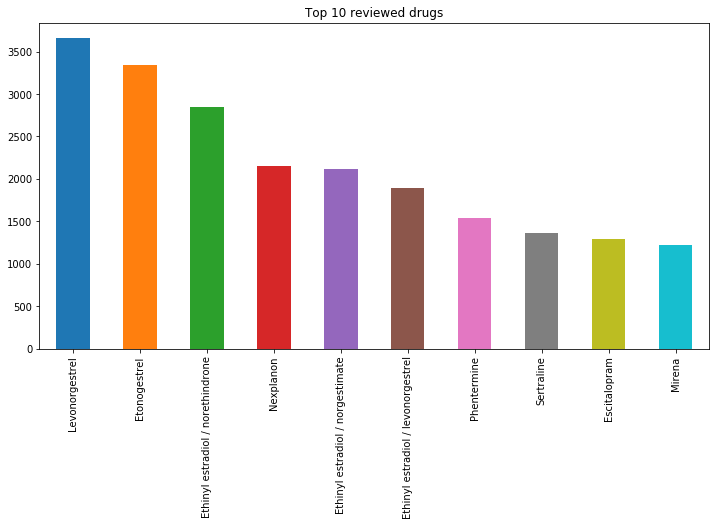

In [7]:
# Top 10 most reviewed drug names
plot = drugs.drugName.value_counts().nlargest(10).plot(kind='bar', title="Top 10 reviewed drugs", figsize=(12,6))

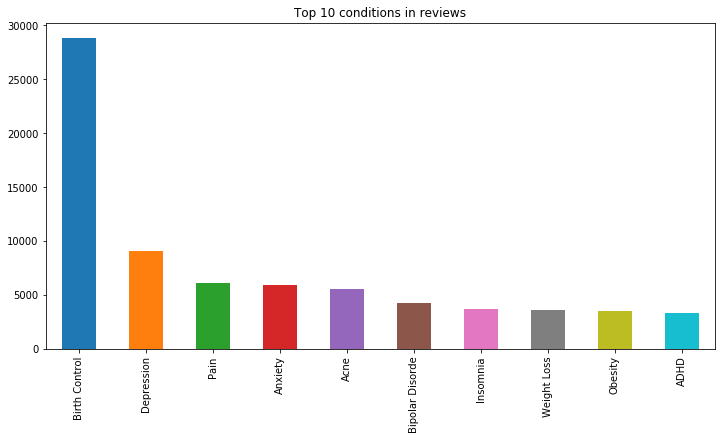

In [8]:
# Top 10 most suffered condition by reviewers
plot = drugs.condition.value_counts().nlargest(10).plot(kind='bar', title="Top 10 conditions in reviews", figsize=(12,6))

In [9]:
drugs.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160397 entries, 0 to 161296
Data columns (total 7 columns):
ID             160397 non-null int64
drugName       160397 non-null object
condition      159498 non-null object
review         160397 non-null object
rating         160397 non-null int64
date           160397 non-null object
usefulCount    160397 non-null int64
dtypes: int64(3), object(4)
memory usage: 9.8+ MB


In [10]:
drugs.isnull().any()

ID             False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [11]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

#check to see stopwards were imported
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [12]:
# load nltk's SnowballStemmer as variabled 'stemmer'
#Stemming breaks down the word to its root
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [13]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [14]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

## Need help with the indent

In [17]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []

for i in drugs.review:[]
allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list


allwords_tokenized = tokenize_only(i)
totalvocab_tokenized.extend(allwords_tokenized)

In [20]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 63 items in vocab_frame


In [23]:
vocab_frame.head()

,words
i,i
ve,ve
had,had
chronic,chronic
constip,constipation


In [24]:


#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time 
tfidf_matrix = tfidf_vectorizer.fit_transform(drugs.review) #fit the vectorizer to synopses

print(tfidf_matrix.shape)


C:\Users\James\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 5min 21s
(160397, 17)


In [33]:
type(tfidf_matrix)
print(tfidf_matrix)

  (0, 1)	1.0
  (1, 1)	0.2648412348403749
  (1, 14)	0.570821784235526
  (1, 10)	0.2813366708688551
  (1, 0)	0.7244800125571619
  (2, 1)	0.43604214560830007
  (2, 14)	0.7048629220484735
  (2, 10)	0.23160035044748634
  (2, 0)	0.3976015030491186
  (2, 9)	0.2537390319051547
  (2, 11)	0.19216226088417032
  (3, 0)	0.6794558428531428
  (3, 12)	0.27356877107732774
  (3, 5)	0.27895648029610565
  (3, 6)	0.25243007109463594
  (3, 7)	0.5674171537871686
  (4, 10)	0.3205215322893367
  (4, 9)	0.3511601910390623
  (4, 12)	0.3323246503381127
  (4, 5)	0.6777390153772334
  (4, 2)	0.33551885332531084
  (4, 16)	0.3026709772091184
  (5, 1)	0.46992505679789986
  (5, 14)	0.2532115698864206
  (5, 10)	0.24959699179220088
  :	:
  (160389, 8)	0.5924866687139682
  (160390, 1)	0.4214309319068659
  (160390, 0)	0.7685567720698379
  (160390, 7)	0.48136935687442955
  (160391, 0)	0.44244976150208704
  (160391, 6)	0.49313414223998364
  (160391, 16)	0.4867418902945774
  (160391, 13)	0.5693322918440893
  (160392, 14)	1.0
  

In [25]:
#Vocab matrix
terms = tfidf_vectorizer.get_feature_names()

## Need to break Matrix up into several

In [44]:
#Calculating distances
%time
dist1 = 1 - cosine_similarity(X=tfidf_matrix[0:2], Y=tfidf_matrix)
dist2 = 1 - cosine_similarity(X=tfidf_matrix[2:4], Y=tfidf_matrix)

Wall time: 0 ns


## Append broken matrix up into one

In [54]:
np.append(dist1, dist2, axis=0)

array([[ 0.00000000e+00,  7.35158765e-01,  5.63957854e-01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 7.35158765e-01,  0.00000000e+00,  1.28954935e-01, ...,
         1.00000000e+00,  1.00000000e+00,  6.26450676e-01],
       [ 5.63957854e-01,  1.28954935e-01, -2.22044605e-16, ...,
         1.00000000e+00,  9.49260261e-01,  6.05369252e-01],
       [ 1.00000000e+00,  5.07747822e-01,  7.29847336e-01, ...,
         7.47569929e-01,  9.09734227e-01,  6.59822707e-01]])

In [30]:
tfidf_matrix

<160397x17 sparse matrix of type '<class 'numpy.float64'>'
	with 720686 stored elements in Compressed Sparse Row format>